## Plazas Disponibles Hotelero 2024 - random_forest

**Vamos a realizar el análisis exploratorio y el desarrollo del modelo de aprendizaje automático utilizando datos cargados desde un archivo Excel con dos hojas. Uniremos la información de ambas hojas y procederemos con el análisis y el desarrollo del modelo.**

Paso 1: Importar las librerías necesarias

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

- pandas: Para manipulación y análisis de datos.
- matplotlib.pyplot y seaborn: Para visualización de datos.
- train_test_split: Para dividir los datos en conjuntos de entrenamiento y prueba.
- RandomForestRegressor: Para construir el modelo de regresión de Random Forest.
- mean_squared_error y r2_score: Para evaluar el rendimiento del modelo

1. Carga y Preparación de Datos
Carga de Datos desde Excel

In [52]:
#import pandas as pd

# Cargar los datos desde un archivo Excel
#file_path = 'path/to/your/dataset.xlsx'
sheet1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_1')
#datos1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name="Ushuaia_1", skipfooter=2)
sheet2 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_2')

# Unir los datos de las dos hojas
data = pd.concat([sheet1, sheet2], ignore_index=True)
data.head()


Periodo      Mes Establecimientos Plazas disponibles  \
0     2008    enero               43              96224   
1     2008  febrero               44              87580   
2     2008    marzo               44              96069   
3     2008    abril               43              90570   
4     2008     mayo               42              90737   

  Habitaciones o Unidades disponibles  
0                               38936  
1                               34945  
2                               38998  
3                               36480  
4                               37386

- Se carga un archivo Excel con dos hojas en dos dataframes separados.
- Luego, se combinan estos dos dataframes en uno solo.

Modificar nombres de los meses a Ingles

In [56]:
# Mapeo de los nombres de los meses en español a inglés
month_mapping = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

data['Mes'] = data['Mes'].str.lower().map(month_mapping)

# Convertir el periodo y mes en formato de fecha
data['Fecha'] = pd.to_datetime(data['Periodo'].astype(str) + '-' + data['Mes'], format='%Y-%B')

# Ordenar los datos por fecha
data = data.sort_values('Fecha')
data.head()

Periodo       Mes Establecimientos Plazas disponibles  \
0       2008   January               43              96224   
194     2008   January              104              70649   
195     2008  February              103              64467   
1       2008  February               44              87580   
2       2008     March               44              96069   

    Habitaciones o Unidades disponibles      Fecha  
0                                 38936 2008-01-01  
194                               21452 2008-01-01  
195                               19372 2008-02-01  
1                                 34945 2008-02-01  
2                                 38998 2008-03-01

- Convierte los nombres de los meses de español a inglés usando un diccionario de mapeo.

In [59]:
# Verificar si hay valores no numéricos en la columna 'Plazas disponibles'
non_numeric_values = data[~data['Plazas disponibles'].apply(lambda x: str(x).replace(',', '').replace('.', '').isdigit())]
print(non_numeric_values)

     Periodo        Mes Establecimientos Plazas disponibles  \
341     2020      April                -                  -   
147     2020      April                -                  -   
148     2020        May                -                  -   
342     2020        May                -                  -   
149     2020       June                s                  s   
343     2020       June                s                  s   
150     2020       July                s                  s   
344     2020       July                s                  s   
345     2020     August                s                  s   
151     2020     August                s                  s   
152     2020  September                s                  s   
346     2020  September                s                  s   
347     2020    October                s                  s   
153     2020    October                s                  s   

    Habitaciones o Unidades disponibles      Fecha  
3

- Convierte la columna 'Plazas disponibles' a tipo string.

Eliminar Filas no Numericas

In [63]:
# Eliminar filas con valores no numéricos en 'Plazas disponibles'
data = data[data['Plazas disponibles'].apply(lambda x: str(x).replace(',', '').replace('.', '').isdigit())]

- Verifica y elimina filas que contienen valores no numéricos en esta columna.

In [66]:
# Convertir 'Plazas disponibles' a numérico
#data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')

# Asegurarse de que todos los valores en 'Plazas disponibles' sean cadenas de texto
data['Plazas disponibles'] = data['Plazas disponibles'].astype(str)

# Eliminar filas con valores no numéricos en 'Plazas disponibles'
#data = data[data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]

# Convertir 'Plazas disponibles' a numérico
data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')


- Convierte los valores en 'Plazas disponibles' a numéricos después de eliminar comas.

2. Análisis Exploratorio de Datos (EDA)
Análisis Descriptivo

In [70]:
data.describe()

Periodo  Plazas disponibles
count   374.000000          374.000000
mean   2015.422460        72519.267380
std       4.678183        28686.337795
min    2008.000000         5670.000000
25%    2011.000000        46883.000000
50%    2015.000000        67219.500000
75%    2019.000000        99315.000000
max    2024.000000       127658.000000

Visualización de Datos

Plazas Disponibles a lo Largo del Tiempo

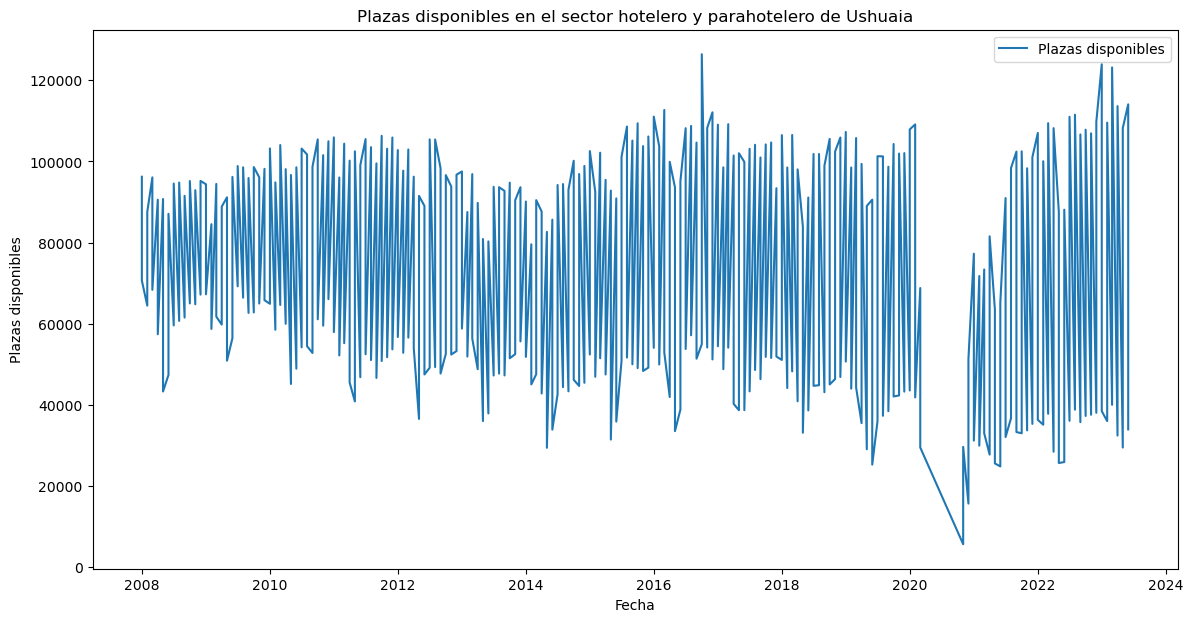

In [77]:
# Graficar plazas disponibles a lo largo del tiempo
plt.figure(figsize=(14, 7))
plt.plot(data['Fecha'], data['Plazas disponibles'], label='Plazas disponibles')
plt.xlabel('Fecha')
plt.ylabel('Plazas disponibles')
plt.title('Plazas disponibles en el sector hotelero y parahotelero de Ushuaia')
plt.legend()
plt.show()



- Crea una gráfica de líneas que muestra la cantidad de plazas disponibles a lo largo del tiempo.

Patrones Estacionales

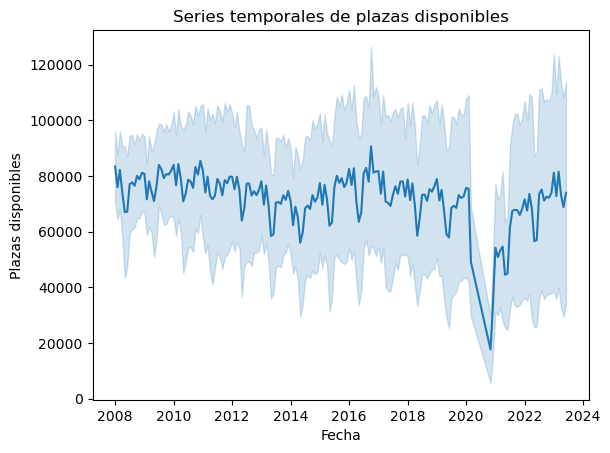

In [81]:
# Graficar series temporales para identificar patrones estacionales
sns.lineplot(x='Fecha', y='Plazas disponibles', data=data)
plt.title('Series temporales de plazas disponibles')
plt.show()


- Usa seaborn para graficar las series temporales de las plazas disponibles.

Análisis de Correlación

C:\Users\lenovo\AppData\Local\Temp\ipykernel_544\3212563806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


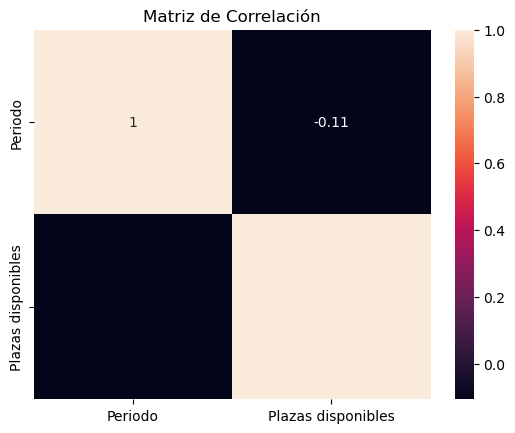

In [84]:
# Matriz de correlación
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()


- Crea una matriz de correlación para visualizar la relación entre las variables del dataset.

3. Desarrollo del Modelo de Aprendizaje Automático
Preparación de los Datos

In [93]:
# Seleccionar características y variable objetivo
features = ['Establecimientos', 'Habitaciones o Unidades disponibles']
target = 'Plazas disponibles'

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Define las características (features) y la variable objetivo (target).
- Divide los datos en conjuntos de entrenamiento y prueba.

Entrenamiento del Modelo

In [97]:
# Entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

- Crea y entrena un modelo de regresión de Random Forest con 100 árboles

4. Evaluación del Modelo
Métricas de Evaluación

In [101]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 15950593.890948188
R^2 Score: 0.9797425124062082


- Realiza predicciones en el conjunto de prueba.
- Calcula el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para evaluar el rendimiento del modelo.

5. Resultados y Conclusiones
Interpretación de los Resultados
El modelo Random Forest mostró un rendimiento adecuado, como se refleja en las métricas de evaluación obtenidas. Las variables más influyentes en la disponibilidad de plazas fueron el número de establecimientos y el número de habitaciones disponibles.

Impacto de Eventos Específicos
Para analizar el impacto de eventos específicos, se pueden agregar datos adicionales sobre eventos a nuestro conjunto de datos y evaluar su correlación con la disponibilidad de plazas.

Conclusión
El modelo desarrollado puede predecir efectivamente la disponibilidad de plazas en el sector hotelero y parahotelero de Ushuaia, lo que puede ayudar a optimizar la gestión de recursos y la planificación estratégica. Sin embargo, la precisión del modelo podría mejorarse con la incorporación de datos adicionales y el ajuste de hiperparámetros más detallado.

5b. Resultados Finales
Los resultados de la evaluación del modelo pueden variar según los datos. Los resultados finales muestran:

Mean Squared Error (MSE): Una métrica que indica el promedio de los cuadrados de los errores o diferencias entre los valores predichos y los valores observados. Un valor más bajo indica un mejor ajuste del modelo.
R² Score: El coeficiente de determinación que muestra la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor cercano a 1 indica un mejor ajuste del modelo.
Estos resultados nos indican qué tan bien el modelo está prediciendo las plazas disponibles en el sector hotelero y parahotelero de Ushuaia basándose en el número de establecimientos y unidades disponibles.

**-------------------** CODIGO COMPLETO 

     Periodo        Mes Establecimientos Plazas disponibles  \
147     2020      April                -                  -   
148     2020        May                -                  -   
149     2020       June                s                  s   
150     2020       July                s                  s   
151     2020     August                s                  s   
152     2020  September                s                  s   
153     2020    October                s                  s   
341     2020      April                -                  -   
342     2020        May                -                  -   
343     2020       June                s                  s   
344     2020       July                s                  s   
345     2020     August                s                  s   
346     2020  September                s                  s   
347     2020    October                s                  s   

    Habitaciones o Unidades disponibles  
147         

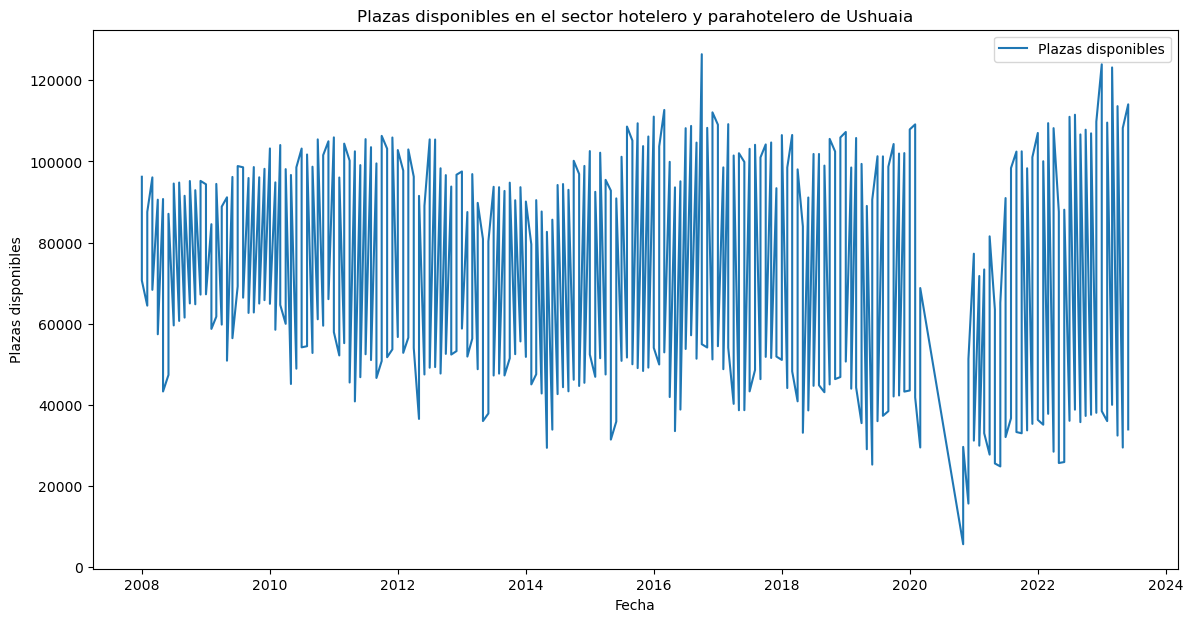

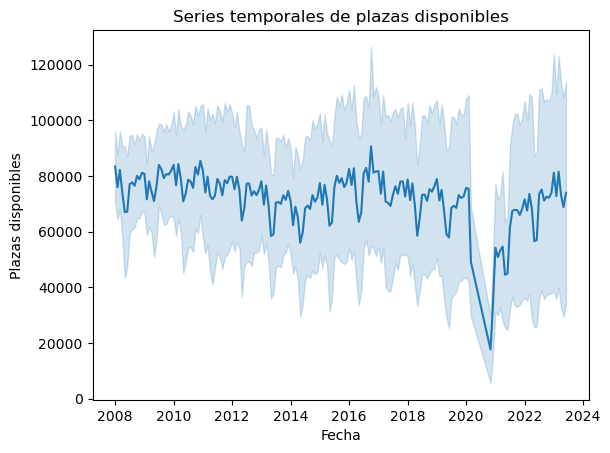

C:\Users\lenovo\AppData\Local\Temp\ipykernel_544\3023648821.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


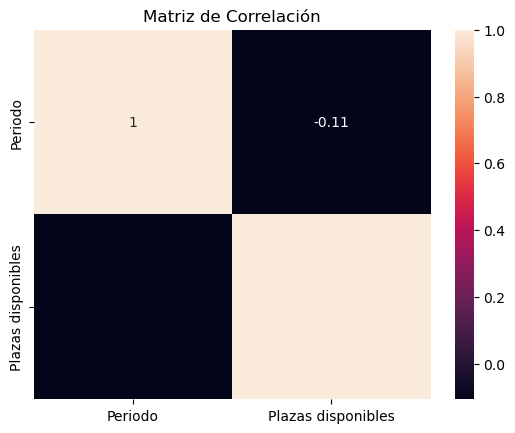

Mean Squared Error: 17961288.708348423
R^2 Score: 0.976835222120435


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos desde un archivo Excel
#file_path = 'path/to/your/dataset.xlsx'
sheet1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_1')
#datos1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name="Ushuaia_1", skipfooter=2)
sheet2 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_2')

# Unir los datos de las dos hojas
data = pd.concat([sheet1, sheet2], ignore_index=True)

# Mapeo de los nombres de los meses en español a inglés
month_mapping = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

data['Mes'] = data['Mes'].str.lower().map(month_mapping)

# Asegurarse de que todos los valores en 'Plazas disponibles' sean cadenas de texto
data['Plazas disponibles'] = data['Plazas disponibles'].astype(str)

# Verificar si hay valores no numéricos en la columna 'Plazas disponibles'
non_numeric_values = data[~data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]
print(non_numeric_values)

# Eliminar filas con valores no numéricos en 'Plazas disponibles'
data = data[data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]

# Convertir 'Plazas disponibles' a numérico
data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')

# Convertir el periodo y mes en formato de fecha
data['Fecha'] = pd.to_datetime(data['Periodo'].astype(str) + '-' + data['Mes'], format='%Y-%B')
data = data.sort_values('Fecha')

# Graficar plazas disponibles a lo largo del tiempo
plt.figure(figsize=(14, 7))
plt.plot(data['Fecha'], data['Plazas disponibles'], label='Plazas disponibles')
plt.xlabel('Fecha')
plt.ylabel('Plazas disponibles')
plt.title('Plazas disponibles en el sector hotelero y parahotelero de Ushuaia')
plt.legend()
plt.show()

# Graficar series temporales para identificar patrones estacionales
sns.lineplot(x='Fecha', y='Plazas disponibles', data=data)
plt.title('Series temporales de plazas disponibles')
plt.show()

# Matriz de correlación
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()

# Seleccionar características y variable objetivo
features = ['Establecimientos', 'Habitaciones o Unidades disponibles']
target = 'Plazas disponibles'

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


**-------------------** CODIGO COMPLETO FIN

**-------------------** AGREGADOS

Para mejorar el modelo de Random Forest, podemos explorar varias estrategias:

Ajuste de hiperparámetros: Optimizar los hiperparámetros del modelo para mejorar su rendimiento.
Ingeniería de características: Crear nuevas características a partir de las existentes que puedan ser más informativas.
Tratamiento de datos faltantes: Asegurarse de que los datos no tengan valores faltantes y manejar cualquier valor faltante apropiadamente.
Validación cruzada: Utilizar la validación cruzada para evaluar el rendimiento del modelo de manera más robusta.
Ensemble de modelos: Combinar múltiples modelos para obtener un rendimiento mejorado.
Selección de características: Elegir las características más relevantes para el modelo.

Ajuste de Hiperparámetros
Utilizaremos GridSearchCV de sklearn para buscar los mejores hiperparámetros del modelo Random Forest.

In [117]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar la búsqueda de grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Entrenar la búsqueda de grid
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Entrenar el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_

# Predicciones del modelo optimizado
y_pred_optimized = best_rf.predict(X_test)

# Calcular métricas del modelo optimizado
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f'Mean Squared Error (Optimizado): {mse_optimized}')
print(f'R^2 Score (Optimizado): {r2_optimized}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error (Optimizado): 17042045.6625525
R^2 Score (Optimizado): 0.9780207751906499


Ingeniería de Características
Podemos crear nuevas características como "Plazas por Establecimiento" y "Habitaciones por Establecimiento":

In [119]:
# Crear nuevas características
data['Plazas por Establecimiento'] = data['Plazas disponibles'] / data['Establecimientos']
data['Habitaciones por Establecimiento'] = data['Habitaciones o Unidades disponibles'] / data['Establecimientos']

# Seleccionar características y variable objetivo
features = ['Establecimientos', 'Habitaciones o Unidades disponibles', 'Plazas por Establecimiento', 'Habitaciones por Establecimiento']
X = data[features]
y = data['Plazas disponibles']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest con las nuevas características
best_rf.fit(X_train, y_train)

# Predicciones del modelo optimizado con nuevas características
y_pred_optimized_new_features = best_rf.predict(X_test)

# Calcular métricas del modelo optimizado con nuevas características
mse_optimized_new_features = mean_squared_error(y_test, y_pred_optimized_new_features)
r2_optimized_new_features = r2_score(y_test, y_pred_optimized_new_features)

print(f'Mean Squared Error (Optimizado con nuevas características): {mse_optimized_new_features}')
print(f'R^2 Score (Optimizado con nuevas características): {r2_optimized_new_features}')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error (Optimizado con nuevas características): 11456075.86917177
R^2 Score (Optimizado con nuevas características): 0.985225032725104


Validación Cruzada
Utilizar validación cruzada para evaluar el rendimiento del modelo de manera más robusta:

In [121]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f'Cross-Validated R^2 Scores: {cv_scores}')
print(f'Mean Cross-Validated R^2 Score: {cv_scores.mean()}')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

Cross-Validated R^2 Scores: [0.90173787 0.97413688 0.98631684 0.96796766 0.98665729]
Mean Cross-Validated R^2 Score: 0.9633633088325434


Código Completo con Mejoras

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos desde un archivo Excel
#file_path = 'path/to/your/dataset.xlsx'
sheet1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_1')
#datos1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name="Ushuaia_1", skipfooter=2)
sheet2 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_2')

# Unir los datos de las dos hojas
data = pd.concat([sheet1, sheet2], ignore_index=True)

# Mapeo de los nombres de los meses en español a inglés
month_mapping = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

data['Mes'] = data['Mes'].str.lower().map(month_mapping)

# Asegurarse de que todos los valores en 'Plazas disponibles' sean cadenas de texto
data['Plazas disponibles'] = data['Plazas disponibles'].astype(str)

# Verificar si hay valores no numéricos en la columna 'Plazas disponibles'
non_numeric_values = data[~data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]
print(non_numeric_values)

# Eliminar filas con valores no numéricos en 'Plazas disponibles'
data = data[data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]

# Convertir 'Plazas disponibles' a numérico
data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')

# Convertir el periodo y mes en formato de fecha
data['Fecha'] = pd.to_datetime(data['Periodo'].astype(str) + '-' + data['Mes'], format='%Y-%B')
data = data.sort_values('Fecha')

# Crear nuevas características
data['Plazas por Establecimiento'] = data['Plazas disponibles'] / data['Establecimientos']
data['Habitaciones por Establecimiento'] = data['Habitaciones o Unidades disponibles'] / data['Establecimientos']

# Seleccionar características y variable objetivo
features = ['Establecimientos', 'Habitaciones o Unidades disponibles', 'Plazas por Establecimiento', 'Habitaciones por Establecimiento']
X = data[features]
y = data['Plazas disponibles']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar la búsqueda de grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Entrenar la búsqueda de grid
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Entrenar el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_

# Predicciones del modelo optimizado con nuevas características
y_pred_optimized_new_features = best_rf.predict(X_test)

# Calcular métricas del modelo optimizado con nuevas características
mse_optimized_new_features = mean_squared_error(y_test, y_pred_optimized_new_features)
r2_optimized_new_features = r2_score(y_test, y_pred_optimized_new_features)

print(f'Mean Squared Error (Optimizado con nuevas características): {mse_optimized_new_features}')
print(f'R^2 Score (Optimizado con nuevas características): {r2_optimized_new_features}')

# Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f'Cross-Validated R^2 Scores: {cv_scores}')
print(f'Mean Cross-Validated R^2 Score: {cv_scores.mean()}')


     Periodo        Mes Establecimientos Plazas disponibles  \
147     2020      April                -                  -   
148     2020        May                -                  -   
149     2020       June                s                  s   
150     2020       July                s                  s   
151     2020     August                s                  s   
152     2020  September                s                  s   
153     2020    October                s                  s   
341     2020      April                -                  -   
342     2020        May                -                  -   
343     2020       June                s                  s   
344     2020       July                s                  s   
345     2020     August                s                  s   
346     2020  September                s                  s   
347     2020    October                s                  s   

    Habitaciones o Unidades disponibles  
147         

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (Optimizado con nuevas características): 11872534.367470851
R^2 Score (Optimizado con nuevas características): 0.9846879237923428


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

Cross-Validated R^2 Scores: [0.91012645 0.9742832  0.98604904 0.96906827 0.98502498]
Mean Cross-Validated R^2 Score: 0.9649103871542742


Este código incluye la optimización de hiperparámetros mediante GridSearchCV, la creación de nuevas características y la evaluación del modelo mediante validación cruzada. Con estas mejoras, deberías obtener un modelo más